## Cinquième compte rendu, Analyse Numérique

---

<center> Abstract </center>

Dans ce travail pratique, il sera question d'appliquer la méthode de Newton à différents systèmes. Dans le premier cas, en dimension 1 (sur $\mathbb R$ donc), on cherchera à approximer la valeur de $\sqrt{3}$. Dans le deuxième, on étudiera les équations du pendule non linéarisées, dont on tracera le portrait de phase. Enfin, dans la dernière application, il s'agira de se concentrer sur un problème appliqué à un cas pratique à base d'échelles reposant sur un mur.

---

In [30]:
# les eternels imports
import numpy as np
import numpy.linalg as la
import scipy as sp
import scipy.linalg as spla
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Exercice 1 : La valeur de racine de 3

Que l'on se demande combien vaut exactement le double du cosinus de l'angle $\frac{\pi}{6}$, la distance entre deux côtés opposés d'un hexagone régulier de côté 1 ou encore la longueur de la diagonale d'un cube de côté 1; la réponse est dans tous les cas $\sqrt{3}$. Tout bon mathématicien sait que ce nombre - que l'on retrouve aussi sous le nom de _constante de Théodorus_ dans la litérature - s'évalue à peu près à 1.7, mais peut-on faire mieux ?

Une première approche à ce problème revient à définir une fonction $g$ dont nous savons pertinemment que $\sqrt{3}$ est une solution et appliquer la méthode du point fixe. En cherchant un peu, on tombe rapidement sur la fonction $g(x) = x^2 - 3$. 

Sans plus attendre, implémentons la méthode du point fixe, à savoir prenons notre fonction $g$ définie auparavant et posons $f(x) = x - g(x)$, cette définition ne sort pas de nulle part, il suffit de remarquer que tout zéro de $g$ sera point fixe de $f$. Ajoutons alors nos deux applications au code ainsi que les itérations de la méthode du point fixe dont on rappelle le principe :

- **Init** : prendre $x_0 \in \mathbb R$ 
- **Iter** : pour $x_k \in \mathbb R$ connu, on définit $x_{k+1} = f(x_k)$

Dans la suite on choisira le point de départ $x_0 = 1$ proche de $\sqrt3$.

In [4]:
# la fonction g définie en introduction
def g(x):
    return x**2 - 3

# la fonction f sur laquelle on applique la méthode du point fixe
def f(x):
    return x - g(x)

# implémentation de la méthode du point fixe
def iter_point_fixe(nb_iter=10, x0=0):
    x_iter = x0 # on initialise le x_0
    for i in range(nb_iter): # pour un certain nombre d'itération nb_iter donné en paramètre on boucle
        x_iter = f(x_iter) # définition de x_k+1 comme étant f(x_k)
    return x_iter # on renvoie la dernière valeur de x_k

nb_iter = 6
x0 = 1 
print(iter_point_fixe(nb_iter, x0)) 

-58576059


Et patatra ! La méthode ne converge pas du tout, elle semble même s'éloigner de plus en plus... Mais pas de panique, cela vient du fait que nous ayons oublié de considérer l'une des hypothèses de convergence dans notre démarche : l'application $f$ doit être **contractante**

Or un rapide calcul donne $f'(x) = \frac{d}{dx} \left( x - g'(x) \right) = 1 - 2x$ qui n'est pas du tout bornée sur $\mathbb R$ (donc encore moins par 1) et est donc non contractante, la méthode n'aurait jamais pu converger (sauf si l'on part du point $x_0 = \sqrt{3}$).

Il reste possible de sauver les meubles en appliquant une relaxation sur la méthode en introduisant un paramètre $\omega$ à valeur dans $]0, 1[$ et en définissant la nouvelle itération comme 

- **Iter** : $x_k \in \mathbb R$ connu et on pose  $x_{k+1} = \omega f(x_k) + (1 - w) x_k$

In [5]:
'''
ici, j'ai pris la liberté d'en faire plus afin d'obtenir
des sorties plus visuelles lorsque l'on fait tourner le programme,
ces parties seront indiquées en commentaire
'''

def iter_point_fixe_relax(k, x0, relax=0.5):
    max_iter = 100 # on commence par définir un nombre maximal d'itération comme test d'arrêt
    w = relax # notre coefficient de relaxation omega
    print(w) # on affiche omega pour rendre compte de la convergence selon sa valeur dans ]0, 1[
    x_iter = x0 # on initialise la méthode
    iter = 0 # on initialise l'indexeur sur lequel nous allons boucler
    x_prec = 100000 # x de la précédente itération qui permet de calculer le résidu x_k+1 - x_k
                    #qui servira aussi de test d'arrêt
        
    while iter < max_iter and np.abs(x_iter - x_prec) > 1e-7:
        x_prec = x_iter # nouvelle attribution du x précédent
        if np.abs(x_prec) > 1e7: # condition d'arrêt si la méthode diverge en l'infini
            return "ne converge pas"
        x_iter = w * f(x_iter) + (1 - w) * x_iter # calcul de l'itération x_k+1
        iter += 1 # c'est un while, on incrémente l'itération pour ne pas bloquer la boucle...
    if iter == max_iter: # nouveau test d'arrêt sur le nombre d'itération si l'on dépasse le nombre maximal d'itérations
        return "ne converge pas"
    return np.round(x_iter, 7), iter    # on renvoie la dernière valeur de x trouvée arrondie à la précision choisie
                                        #ainsi que le nombre nécéssaire d'itérations pour l'atteindre

    
for u in [1, 2, 4, 8]: # On applique la méthode pour différents points de départ
    print("x0 =", u) # affiche le point de départ choisi
    for j in range(1, 10): # boucle pour faire varier omega = j / 10 entre 0 et 1
        print(iter_point_fixe_relax(10, u, j / 10)) # on affiche le résultat trouvé et le nombre d'itération nécessaires

x0 = 1
0.1
(1.7320507, 37)
0.2
(1.7320508, 15)
0.3
(1.7320508, 5)
0.4
(1.7320508, 17)
0.5
(1.7320508, 52)
0.6
ne converge pas
0.7
ne converge pas
0.8
ne converge pas
0.9
ne converge pas
x0 = 2
0.1
(1.7320509, 34)
0.2
(1.7320508, 14)
0.3
(1.7320508, 6)
0.4
(1.7320508, 18)
0.5
(1.7320508, 51)
0.6
ne converge pas
0.7
ne converge pas
0.8
ne converge pas
0.9
ne converge pas
x0 = 4
0.1
(1.732051, 37)
0.2
(1.7320508, 15)
0.3
(1.7320508, 8)
0.4
(1.7320508, 21)
0.5
ne converge pas
0.6
ne converge pas
0.7
ne converge pas
0.8
ne converge pas
0.9
ne converge pas
x0 = 8
0.1
(1.7320509, 34)
0.2
ne converge pas
0.3
ne converge pas
0.4
ne converge pas
0.5
ne converge pas
0.6
ne converge pas
0.7
ne converge pas
0.8
ne converge pas
0.9
ne converge pas


L'ensemble des lignes précédentes permet de constater que non-seulement la méthode ne marche pas toujours, mais surtout que pour obtenir une précision de 7 chiffres après la virgule, il faut parfois jusqu'a 52 itérations pour un certain choix de $\omega$. Passons au niveau supérieur avec un outil plus puissant : La méthode de Newton

La méthode de Newton (ou encore méthode de Newton-Raphson) est une méthode de calcul permettant de trouver les zéros d'une fonction (tout du moins d'approximer leur valeur avec une grande précision). Qu'on la regarde d'un point de vue géométrique, ou bien algébrique, il s'agit d'une méthode merveilleuse : Convergence rapide, méthode élégante, formulation simple, ... Cette méthode, d'apparence parfaite, présente toutefois l'incovénient majeur de ne converger que dans une certaine zone assez proche du zéro. Or, on utilise cette méthode pour trouver un zéro, mais puisque l'on cherche un point déjà fixé, il suffit de partir de suffisamment près de $\sqrt 3$ pour garantir la convergence de la méthode de Newton et obtenir l'approximation désirée.

Dans le principe la méthode de Newton est définie récursivement par la relation suivante :

- **Init** : prendre $x_0 \in \mathbb R$
- **Iter** : pour $x_k \in \mathbb R$ connu, on écrit $g'(x_k)(x_{k+1} - x_k) = -g(x_k)$

Par ailleurs, si la dérivée $g'$ de $g$ ne s'annule pas, on peut écrire explicitement $x_{k+1} = x_k - \frac{g(x_k)}{g'(x_k)}$.

Dans ce cas la dérivée $g'$ de $g$ est non nulle sur un voisinage autour de $\sqrt 3$ on peut alors implémenter la méthode l'esprit tranquille !

In [6]:
# methode de Newton : g'(x_k) (x_{k+1} - x_k) = -g(x_k)

# définition de la dérivée de l'application g : x --> x^2 - 3
def g_deriv(x):
    return 2 * x

# implémentation de la méthode de Newton
def iter_newton(x0):
    max_iter = 20 # on fixe un nombre maximal d'itération comme condition d'arrêt
    x_iter = x0 # définition du x_0
    iter = 0 # initialisation de l'indexeur de la boucle
    temp = 100000 # sera utilisé pour calculer le résidu x_k+1 - x_k
    while iter < max_iter and np.abs(x_iter - temp) > 10e-7:
        temp = x_iter # on garde en mémoire la valeur du x_k précédent
        if np.abs(temp) > 1e10: # si à un moment la méthode s'éloigne trop, on s'arrête 
            return "ne converge pas"
        x_iter = x_iter - g(x_iter) / g_deriv(x_iter) # définition de l'itération x_k+1
        iter += 1 # on oublie pas d'incrémenter l'indexeur
    return x_iter, iter # on renvoie le x solution ainsi que le nombre d'itérations nécéssaires pour le trouver

for x_init in [1, 2, 4, 8]: # on teste Newton avec comme point de départ 1, 2, 4 puis 8
    print(iter_newton(x_init))
    
    
# précis 15 chiffres après la virgule !

(1.7320508075688772, 5)
(1.7320508075688772, 4)
(1.7320508075688774, 6)
(1.7320508075688774, 7)


C'est l'heure de faire un peu de théorie : Il est possible d'avoir un aperçu de la vitesse de convergence en évaluant, à la main, la quantité $\frac{|x_{k+1} - \sqrt 3|}{|x_{k} - \sqrt 3|^2}$ pour $k$ grandissant : 

$$ | x_{k+1} - \sqrt{3} | = |x_k - \frac{x_k^2 - 3}{2x_k} - \sqrt{3}| = \biggl\vert \frac{(x_k - \sqrt{3})^2}{2x_k} \biggr\vert = \frac{1}{| 2x_k |} \bigl| x_k - \sqrt{3} \bigr|^2$$

d'où 

$$ \frac{|x_{k+1} - \sqrt 3|}{|x_{k} - \sqrt 3|^2} =  \frac{1}{|2x_k|}$$

**Remarque : $\frac{1}{2x_k}$ est égal à $\frac{1}{g'(x_k)}$ résultat déjà énoncé dans le cours**

En se plaçant suffisamment près de $\sqrt 3$, la méthode converge et $\lim_{k \to\infty} x_k = \sqrt 3 $ qui est non-nul. On peut alors écrire

$$ \lim_{k \to\infty} \frac{|x_{k+1} - \sqrt 3|}{|x_{k} - \sqrt 3|^2} = \frac{1}{|2 \sqrt{3}|} \approx 0.2887$$

Retour au code : On peut remarquer que la méthode converge pour chacun des points de départs en environ 5 étapes. La méthode converge donc rapidement, peut-être même trop rapidement pour pouvoir étudier proprement la convergence quadratique prévue par la théorie. Il est toutefois possible de calculer le rapport $\frac{ x_{k+1} - \sqrt{3}}{x_k - \sqrt{3}}$ à chaque étape et observer comment la suite se comporte, par exemple, pour le point de départ $x_0 = 8$ :

x = 1.7320508075688772  err = 0.28868622564649715


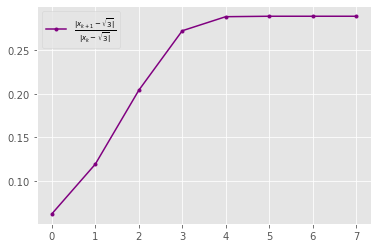

In [63]:
max_iter = 20 # on fixe le nombre d'itérations maximal
iter = 0 # initialisation de l'indexeur
x_actuel = 8 # on fixe le point de départ x_0 de la méthode de Newton
res = 1 # on initialise le résidu à 1
list_iter = [] # tableau qui garde les valeurs des itérations pour le graphe
list_err = [] # tableau dans lequel on garde le rapport err = |x_k+1 - sqrt3| / |x_k - sqrt3| 

while (iter < max_iter) and (res > 1e-12):
    x_iter = x_actuel - g(x_actuel) / g_deriv(x_actuel) # calcul de l'itération x_k+1
    num = np.abs(x_iter - np.sqrt(3)) # on donne un nom pour éviter les lignes à rallonge
    den = np.abs(x_actuel - np.sqrt(3)) # idem ici
    if den > 10e-12: # pour éviter une division par 0
        err = num / den**2 # calcul de l'erreur err
    
    res = np.abs(x_iter - x_actuel) # calcul du résidu |x_k+1 - x_k|
    x_actuel = x_iter # on attribue à x_k la valeur x_k+1
    
    list_iter.append(iter) # on ajoute au tableau pour le graphe
    list_err.append(err) # idem
    
    iter+=1 # on n'oublie pas d'incrémenter l'indexeur

print("x =", x_iter, " err =", err) # on affiche la valeur de x trouvée ainsi que l'erreur finale

# cette partie s'occupe d'afficher le graphe
plt.plot(list_iter, list_err, marker='.', color='purple', ls='-', label=r'$\frac{|x_{k+1} - \sqrt{3}|}{|x_{k} - \sqrt{3}|}$')
plt.legend()
plt.show()

On retrouve bien la valeur que l'on attendait, qui atteste de la convergence quadratique de la méthode de Newton et permet de conclure ce premier exercice !

## Exercice 2 : Les équations non linéarisées du pendule pesant simple

On s'intéresse dans cette section aux équation régissant la position de la tête d'un pendule pesant en fonction du temps. Le système différentiel suivant décrit la situation considérée : 

$$ \begin{cases} x'(t) = f( t, x(t) ), t > 0  \\ x(0) = x^{(0)} \in \mathbb{R}^2 \end{cases}$$

où la fonction $f$ est donnée par l'équation

$$f(t, X) = \begin{bmatrix} x_2 \\ -\sin(x_1) + \varepsilon \sin(t) \end{bmatrix}$$

Plusieurs approches sont possibles. La première consiste en la linéarisation du système différentiel avant de résoudre la résultante à la main, l'autre en la résolution numérique des équations. Ici, c'est la seconde option que l'on adopte. 

**Notations** : Avant toute chose, il est nécessaire pour la suite de définir quelques constantes. On définit ainsi pour un temps final $T = 200$ unités de temps, la quantité $h = T/ N$ notre pas de temps où $N = 10000$. Posons ensuite $t_k = kh$ nos points de temps discrets et $\varepsilon = 0.05 > 0$ Enfin, il sera supposé $x^{(0)} = (0, 0)^T$ 

Afin de rendre compte de la position de la masse en fonction du temps, on se propose de la tracer sur un graphe à l'aide du schéma numérique de Crank-Nicolson.

$$ x^{(n+1)} = x^{(n)} + \frac{h}{2} \left( f \left( t_n, x^{(n)} \right) + f \left( t_{n+1}, x^{(n+1)} \right) \right)$$

Petit souci : Le schéma de Crank-Nicolson est dit _implicite_. Il est donc nécessaire de connaître la position $x_{n+1}$ de la masse à l'instant $t_{n+1} = t_n + h$. Il reste, toutefois, possible de palier cet effet en posant dans un premier temps la fonction $F$ définie comme suit :

$$ F(t, x) = x - x^{(0)} - \frac{h}{2} \begin{bmatrix} x_2^{(0)} + x_2 \\ -\sin(x_1^{(0)}) + \varepsilon \sin(t) - \sin(x_1) + \varepsilon \sin(t+h) \end{bmatrix}$$

où lorsque $F(t, x) = 0$ on a $x$ solution du schéma de Crank-Nicolson. On peut donc déterminer $x_{n+1}$ via la méthode de Newton en dimension 2 (appliquée à la fonction $F$) dont on rappelle le principe :

- **Init** : $x^{(0)} \in \mathbb R^n$
- **Iter** : pour $x^{(k)} = (x_k, y_k)^{T}$ connu on écrit $\mathcal{J}_F \left(x^{(k)} \right) \left( x^{(k+1)} - x^{(k)}\right) = -F \left(x^{(k)} \right)$

La matrice jacobienne $\mathcal{J}_F$ évaluée au point  $x^{(k)} = (x_1, x_2)^T$ donne

$$ \mathcal{J}_F \left(x^{(k)} \right) = \begin{bmatrix} \frac{\partial }{\partial x_1} F \left( x_1, x_2 \right) & \frac{\partial }{\partial x_2} F \left( x_1, x_2 \right)  \end{bmatrix} = \begin{bmatrix} 1 & -\frac h2 \\ - \frac h2 \cos(x_1) & 1 \end{bmatrix} $$

En définissant l'accroissement comme la valeur $acc = \begin{bmatrix} acc_1 & acc_2 \end{bmatrix}^T = x^{(k+1)} - x^{(k)}$, ainsi que $\alpha = \begin{bmatrix} \alpha_1 & \alpha_2 \end{bmatrix}^T$ où $\alpha_1 = \left( -F(x^{(k)}) \right)_1$ et $\alpha_2 = \left( -F(x^{(k)}) \right)_2$, on est ramenés à calculer le système linéaire suivant :

$$ \mathcal{J}_F \left( x^{(k)} \right) \begin{bmatrix} acc_1 \\ acc_2 \end{bmatrix} = \begin{bmatrix} \alpha_1 \\ \alpha_2 \end{bmatrix} \qquad (1)$$

La jacobienne de $F$ admet pour déterminant la quantité $ \det \left( {\mathcal{J}_F \left(x^{(k)} \right)} \right) = 1 - \frac{h^2}{4} \cos(x_1) $, qui est toujours non-nul. $\mathcal{J}_F$ est donc inversible d'inverse 

$$\mathcal{J}_F^{-1} \left(x^{(k)} \right) = \frac{4}{4 - h^2 \cos(x_1)} \begin{bmatrix} 1 & \frac h2 \\ \frac h2 \cos(x_1) & 1  \end{bmatrix}$$

Les solutions du système $(1)$ sont alors prêtes à être calculées, et s'évaluent à :

$$ \begin{bmatrix} acc_1 \\ acc_2 \end{bmatrix} = \mathcal{J}_F^{-1} \left( x^{(k)} \right) \begin{bmatrix} \alpha_1 \\ \alpha_2 \end{bmatrix} \qquad \iff \qquad \begin{bmatrix} acc_1 \\ acc_2 \end{bmatrix} = \frac{4}{4 - h^2 \cos(x_1)} \begin{bmatrix} \alpha_1 + \frac h2 \alpha_2 \\ \frac{h}{2} \alpha_1 \cos(x_1) + \alpha_2 \end{bmatrix}$$

Après tous ces calculs, il est temps d'implémenter tout cela à notre code !

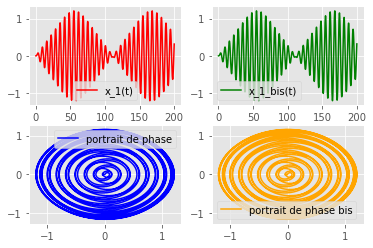

In [76]:
N = 10000 # définition de la finesse de subdivision
T = 200 # intervalle de temps considéré
h = T / N # pas de temps considéré
hbis = T / (2 * N) # second pas de temps hbis = h/2 < h pour tester avec un pas de temps différent

# les différentes listes qui seront utiles pour le schéma de C-N et les graphes finaux
time = [0] # liste des temps
timebis = [0] # liste des temps pour le second h
list_x1 = [0] # garde la position de x_1 en fonction du temps selon le pas de temps h
list_x2 = [0] #  idem pour x_2
list_x1bis = [0] # ici on garde la position de x_1 en fonction du temps selon le pas de temps hbis
list_x2bis = [0] # idem pour x_2 avec le pas de temps hbis

eps = 0.05 # valeur de epsilon

def newton(x1o, x2o, h, eps, t):
    x1 = x1o # on initialise x_1
    x2 = x2o # on initialise x_2
    max_iter = 20 # on définit un nombre maximal d'itérations
    iter = 0 # initialisation de l'indexeur des itérations
    res = 1 # on définit le résidu |x_k+1 - x_k|
    while iter < max_iter and np.abs(res) > 1e-10:
        det = 1 / (1 - (h**2 / 4) * np.cos(x1)) #determinant de la jacobienne 
        alpha1 = -(x1 - x1o - h/2 * (x2o + x2)) # première composante du second membre 
        alpha2 = -(x2 - x2o - h / 2 * (eps * np.sin(t) + eps * np.sin(t + h) - np.sin(x1) - np.sin(x1o))) # deuxième composante du second membre
    
        acc1 = det * (alpha1 + h/2 * alpha2)                  # | solution du système J_F * acc = - F
        acc2 = det * ( h * alpha1 / 2 * np.cos(x1) + alpha2 ) # |
        
        res = la.norm([acc1, acc2]) # nouveau calcul du résidu
        
        x1 = x1 + acc1 # on update les valeurs de x_1
        x2 = x2 + acc2 # idem pour x_2
        
        iter += 1 # on met à jour l'indexeur !
    return x1, x2 # on renvoie les valeurs de x_1 et x_2

''' partie relative au schéma de Crank-Nicolson'''
# pour le premier choix h = 0.02
t = 0 # on initialise le temps
x1, x2 = 0, 0 # on initialise la position de x_1 et x_2
while t < T: # tant que le temps est plus petit que le temps final
    x1, x2 = newton(x1, x2, h, eps, t) # on calcule la position x_k+1 du schéma via la méthode de Newton
    t += h # on incrémente le temps
    time.append(t) # on ajoute le temps au tableau des temps
    list_x1.append(x1) # idem pour le tableau qui garde les valeurs de x_1
    list_x2.append(x2) # idem pour x_2
    
# pour le second choix hbis = 0.01, on répète la même chose que pour h
tbis = 0
x1bis, x2bis = 0, 0
while tbis < T:
    x1bis, x2bis = newton(x1bis, x2bis, hbis, eps, tbis)
    tbis += hbis
    timebis.append(tbis)
    list_x1bis.append(x1bis)
    list_x2bis.append(x2bis)
    

# commandes usuelles pour afficher le graphe de x_1 et x_2 en fonction du temps ainsi que les portraits de phase
fig, ((a,b), (c, d)) = plt.subplots(2,2) 
a.plot(time, list_x1, 'r', label="x_1(t)")
a.legend()
b.plot(timebis, list_x1bis, 'g', label="x_1_bis(t)")
b.legend()
c.plot(list_x1, list_x2, 'b', label="portrait de phase")
c.legend()
d.plot(list_x1bis, list_x2bis, 'orange', label="portrait de phase bis")
d.legend()
plt.show()

**Remarque** : Dans ces schémas on peut observer que le premier $h$ choisi est suffisamment petit pour obtenir une convergence numérique, en effet, pour notre $h_{bis} < h$ on observe que les portraits de phase sont identiques, ce qui nous conforte dans l'idée que notre solution est bonne. 

En changeant la valeur de $\varepsilon$ pour $1$ et en gardant $h = 0.01$, on constate que la solution adopte un profil totalement différent :

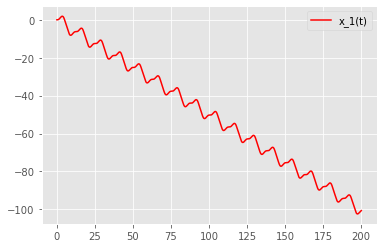

In [77]:
h = 0.01
eps = 1

time = [0] # liste des temps
new_list_x1 = [0] # garde la position de x_1 en fonction du temps selon le pas de temps h

t = 0 # on initialise le temps
x1, x2 = 0, 0 # on initialise la position de x_1 et x_2

while t < T: # tant que le temps est plus petit que le temps final
    x1, x2 = newton(x1, x2, h, eps, t) # on calcule la position x_k+1 du schéma via la méthode de Newton
    t += h # on incrémente le temps
    time.append(t) # on ajoute le temps au tableau des temps
    new_list_x1.append(x1) # idem pour le tableau qui garde les valeurs de x_1
    
# on graphe la position de x_1 en fonction du temps
fig, p = plt.subplots(1, 1) 
p.plot(time, new_list_x1, 'r', label="x_1(t)")
p.legend()
plt.show()

Avec cette allure, on peut supputer que la courbe s'échappe en l'infini dans les négatifs, démontrant l'instabilité de ce choix pour $\varepsilon$. Et c'est sur cette courbe que nous concluons ce second exercice.

### Exercice 3 : Les échelles !

Dans cet exercice on considère deux échelles respectivement de 3m et 4m de long posées contre un mur suivant le schéma  proposé ci-dessous (qui diffère légèrement de celui de l'énoncé, complété par mes soins selon mes besoins) :

<img src="https://i.ibb.co/ncT2TY4/echelles.png" width=600 height=400 />

Notons par $A, B, C$ et $D$ et points où les échelles ont un point de contact avec un mur ainsi que $O$ le point d'intersection entre les deux échelles et $I$ la projection au sol du point $O$. Enfin définissons $\alpha := \overline{AC}$ et $\beta := \overline{BD} $.

Il est alors question de trouver la valeur de la distance $d := x + y$ dont on peut donner une expression sous forme de système. Pour ce faire procédons comme suit :

- Premièrement, considérons les triangles $\Delta_{ABC}$ et $\Delta_{ABD}$, avant d'établir $\alpha^2 + d^2 = 9$ et $\beta^2 + d^2 = 16$ en vertu du théorème de Pythagore.

- En second lieu, le théorème de Thalès appliqué aux deux triangles permet d'écrire $\frac{\overline{OI}}{\overline{CA}} = \frac{\overline{BI}}{\overline{BA}}$ ainsi que $ \frac{\overline{OI}}{\overline{DB}} = \frac{\overline{AI}}{\overline{AB}}$ autrement dit

$$ \begin{cases} \frac{1}{\alpha} = \frac{y}{x + y} \\ \frac{1}{\beta} = \frac{x}{x + y} \end{cases} \quad \iff \quad \begin{cases} \alpha^2 = \left( \frac{x + y}{y} \right)^2 \\ \beta^2 = \left( \frac{x + y}{x} \right)^2\end{cases}$$

- Rentrons la donnée de $\alpha$ et $\beta$ ainsi que celle de $d$ dans les équations obtenues au premier point :

$$ \begin{cases} \beta^2 + d^2 = 16 \\\alpha^2 + d^2 = 9 \end{cases} \iff \begin{cases} \frac{(x + y)^2}{x^2} + (x + y)^2 = 16 \qquad \qquad (1) \\ \frac{(x + y)^2}{y^2} + (x + y)^2 = 9 \qquad \qquad (2) \end{cases}$$

- Il ne reste plus qu'à multiplier $(1)$ par $x^2$ et $(2)$ par $y^2$ pour établir le résultat souhaité :

$$ \begin{cases} 16x^2 = (x^2 + 1)(x + y)^2 \\ 9y^2 = (y^2 + 1)(x+y)^2 \end{cases}$$


Ce système admet des solutions, qui s'avèrent fastidieuses à calculer à la main. En ce sens, il peut être intéressant d'appliquer la méthode de Newton en dimension $n =2$ à la fonction $f$ définie comme suit :

\begin{align}
f &: \mathbb{R}^2 \to \mathbb{R}^2 \\
\begin{bmatrix} x \\ y \end{bmatrix} &\mapsto \begin{bmatrix} 16x^2 - (x^2 +1)(x + y)^2 \\ 9y^2 - (y^2 + 1)(x + y)^2 \end{bmatrix}
\end{align}


**Et maintenant, direction Python !**

Ajoutons donc la fonction $f$ au code :

In [9]:
def f(x, y):
    d = x + y
    return (16*(x**2) - (x**2 + 1)*(d**2) , 9*(y**2) - (y**2 + 1)*(d**2))

Une dernière chose avant d'appliquer la méthode de Newton, il reste à vérifier que l'application $f$ est bien différentiable. Or il s'agit d'une somme, produit et composition d'applications toutes différentiables, la vérification est achevée.

Bien que connu, on rappelle le procédé d'itération de la méthode de Newton en dimension $2$:

- **Init** : prendre $x^{(0)} = (x_0, y_0)^{T} \in \mathbb{R}^2$ 
- **Iter** : pour $x^{(k)} = (x_k, y_k)^{T}$ connu on écrit $\mathcal{J}_f \left(x^{(k)} \right) \left( x^{(k+1)} - x^{(k)}\right) = -f \left(x^{(k)} \right)$

autrement dit :

$$
\mathcal{J}_f \left( \begin{bmatrix} x_k \\ y_k \end{bmatrix} \right)  \left( \begin{bmatrix} x_{k+1} \\ y_{k+1} \end{bmatrix} - \begin{bmatrix} x_k \\ y_k \end{bmatrix} \right) = -f \begin{bmatrix} x_k \\ y_k \end{bmatrix} \qquad \qquad (3)
$$

Où pour $X = (x, y)^T \in \mathbb R ^2, \mathcal{J}_f (X) $ désigne la matrice jacobienne de $f$ appliquée au point $X$, commençons par calculer à la main les coefficients de la jacobienne sachant

$$\mathcal{J}_f(X) = \begin{bmatrix} \frac{\partial f}{\partial x}(x, y) \quad \frac{\partial f}{\partial y}(x,y) \end{bmatrix} $$

Après les calculs on obtient :

$$\mathcal{J}_f (X) = \begin{bmatrix} 32x - 2 (x^2 +1)(x + y) - 2x(x + y)^2 & -2(x^2 + 1)(x+y) \\ -2(y^2 + 1)(x+y) & 18y - 2(y^2 + 1)(x+y) - 2y (x + y)^2\end{bmatrix}$$

Dès lors, il ne reste qu'à écrire en python les équations du problème $(3)$

In [10]:
# cette fonction récupère les coordonnées x et y d'un vecteur puis calcule la jacobienne
# de f en ce point
def jacobi_f(x, y):
    s = x + y
    return np.array([[32*x - 2*(x**2 + 1)*s - 2*x*(s**2), -2*(x**2 + 1)*s],
                     [-2*(y**2 + 1)*s, 18*y -2*(y**2 + 1)*s - 2*y*(s**2)]], float)


# On injecte un point de départ x_0, y_0 et on applique la méthode de Newton
def newton(xo, yo):
    x = xo # initialisation de la première composante du point de départ
    y = yo # initialisation de la seconde composante du point de départ
    
    max_iter = 20   # on se fixe un nombre maximual d'itération, la méthode de Newton convergent en ordre
                    # quadratique, 20 itérations semble raisonnable
        
    iter = 0 # on initialise le nombre d'itération, ce sera l'indexeur de la boucle while
    res = 1 # le résidu calculé par la différence entre x_k et x_k+1. Il servira de condition d'arrêt
    
    while iter < max_iter and np.abs(res) > 1e-10:
        jac = jacobi_f(x, y) # on récupère la jacobienne de f au point x_k et y_k
        
        alpha = - np.array(f(x, y)) # il s'agit du second membre du système (3)
        acc = la.solve(jac, alpha) # accroissement entre x_k+1 et x_k à savoir solution de (3)
        acc1, acc2 = acc # ici on récupère la première et seconde composante de l'accroissement en éclatant le tuple
        res = la.norm(acc)  # on actualise le résidu comme étant la norme de l'accroissement qui donne
                            # une notion de distance entre deux termes
    
        # Comme x_k+1 - x_k = acc_1 on retourne l'équation pour trouver x_k+1 = x_k + acc_1, idem pour y_k+1
        x = x + acc1 # on calcule la valeur de x_k+1...
        y = y + acc2 # ... et celle de y_k+1
        
        print(la.norm(np.array([acc1, acc2], float)), "iter = ", iter) # on affiche à l'écran le résidu à chaque étape + l'étape
        iter += 1 # on incrémente l'indexeur pour ne pas rester bloqué dans la boucle
    return x, y # on renvoie le vecteur solution, si convergence il y a


x, y = newton(1, 1) # on applique la méthode de Newton en partant du point (1, 1)
print("solution x, y = ", x, y)

2.6100766272276377 iter =  0
0.8419230719113047 iter =  1
0.582747136582452 iter =  2
0.3604803758624842 iter =  3
0.19702338630400426 iter =  4
0.035955607040203015 iter =  5
0.0016736637763632614 iter =  6
3.375996106876955e-06 iter =  7
1.48861590813671e-11 iter =  8
solution x, y =  0.8572126937733318 1.7460750606498536


On conclut en se rappelant qu'un vecteur solution $(x, y)$ du système $(3)$ donne la distance $d = x + y$ entre les deux murs. Dans notre cas, la distance $d$ s'évalue donc à

In [11]:
print("distance entre les deux murs : ", np.round(x + y, 3), "m")

distance entre les deux murs :  2.603 m


Ce qui permet de conclure ce cinquième et dernier travail pratique d'analyse numérique. Merci d'avoir lu jusqu'ici !